<div style="display: flex; align-items: center;">
    <div style="text-align: center;">
        <h1><b><font color='0B5345'>Practica 6: Diseño de filtros digitales</font></b></h1>
                <h3><font color='0B5345'>Luisa Fernanda Enciso - Jader Stalyn Chingal Atis</font></h3>
    </div>
</div>

In [35]:
# importación de librerías
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [39]:
# FUNCIONES
def plot_filters(n, y_fpb_30, y_fpa_30, y_fpbd_30, main_title):
    """
    Plots the amplitude responses of different FIR filters.

    Parameters:
        n: array-like, time values (x-axis)
        y_fpb_30: array-like, output of the low-pass filter
        y_fpa_30: array-like, output of the  high-pass filter
        y_fpbd_30: array-like, output of the band-pass filter
        main_title: str, title for the entire figure
    """
    plt.figure(figsize=(12, 4))

    plt.subplot(131)
    plt.plot(n, y_fpb_30)
    plt.title("Filtro Pasa Bajas")
    plt.ylabel("Amplitud")
    plt.xlabel("Tiempo (s)")

    plt.subplot(132)
    plt.plot(n, y_fpa_30)
    plt.title("Filtro Pasa Altas")
    plt.ylabel("Amplitud")
    plt.xlabel("Tiempo (s)")

    plt.subplot(133)
    plt.plot(n, y_fpbd_30)
    plt.title("Filtro Pasa Banda")
    plt.ylabel("Amplitud")
    plt.xlabel("Tiempo (s)")

    # Ajustar los subplots
    plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.4, hspace=0.4)

    # Título general
    plt.suptitle(main_title, fontsize=16, y=1.05)

    plt.show()

def mfreqz(b_fpb, b_fpa, b_fpbd, a=1, order=1, nyq_rate=1, main_title="Respuesta en Frecuencia"):
    """
    Plot the impulse response of different filters in the frequency domain.

    Parameters:
        b_fpb: numerator values of the low-pass filter
        b_fpa: numerator values of the high-pass filter
        b_fpbd: numerator values of the band-pass filter
        a: denominator values of the transfer function (default is 1)
        order: order of the filter
        nyq_rate: nyquist frequency
        main_title: str, title for the overall plot
    """

    # Respuesta de frecuencia para cada filtro
    w_fpb, h_fpb = signal.freqz(b_fpb, a)
    w_fpa, h_fpa = signal.freqz(b_fpa, a)
    w_fpbd, h_fpbd = signal.freqz(b_fpbd, a)

    # Magnitudes 
    h_dB_fpb = 20 * np.log10(abs(h_fpb))
    h_dB_fpa = 20 * np.log10(abs(h_fpa))
    h_dB_fpbd = 20 * np.log10(abs(h_fpbd))

    # Fases
    h_phase_fpb = np.unwrap(np.angle(h_fpb))
    h_phase_fpa = np.unwrap(np.angle(h_fpa))
    h_phase_fpbd = np.unwrap(np.angle(h_fpbd))

    plt.figure(figsize=(12, 8))
    plt.suptitle(main_title, fontsize=16)

    # Gráficas de Magnitud
    plt.subplot(3, 3, 1)
    plt.plot((w_fpb / max(w_fpb)) * nyq_rate, abs(h_fpb))
    plt.title("Pasa Bajas - Magnitud")
    plt.ylabel("Magnitud")
    plt.xlabel(r'Frecuencia Normalizada (x$\pi$ rad/muestra)')
    plt.grid(True)

    plt.subplot(3, 3, 2)
    plt.plot((w_fpa / max(w_fpa)) * nyq_rate, abs(h_fpa))
    plt.title("Pasa Altas - Magnitud")
    plt.ylabel("Magnitud")
    plt.xlabel(r'Frecuencia Normalizada (x$\pi$ rad/muestra)')
    plt.grid(True)

    plt.subplot(3, 3, 3)
    plt.plot((w_fpbd / max(w_fpbd)) * nyq_rate, abs(h_fpbd))
    plt.title("Pasa Banda - Magnitud")
    plt.ylabel("Magnitud")
    plt.xlabel(r'Frecuencia Normalizada (x$\pi$ rad/muestra)')
    plt.grid(True)

    # Gráficas de Magnitud en dB
    plt.subplot(3, 3, 4)
    plt.plot((w_fpb / max(w_fpb)) * nyq_rate, h_dB_fpb)
    plt.title("Pasa Bajas - Magnitud (dB)")
    plt.ylabel("Magnitud (dB)")
    plt.xlabel(r'Frecuencia Normalizada (x$\pi$ rad/muestra)')
    plt.grid(True)

    plt.subplot(3, 3, 5)
    plt.plot((w_fpa / max(w_fpa)) * nyq_rate, h_dB_fpa)
    plt.title("Pasa Altas - Magnitud (dB)")
    plt.ylabel("Magnitud (dB)")
    plt.xlabel(r'Frecuencia Normalizada (x$\pi$ rad/muestra)')
    plt.grid(True)

    plt.subplot(3, 3, 6)
    plt.plot((w_fpbd / max(w_fpbd)) * nyq_rate, h_dB_fpbd)
    plt.title("Pasa Banda - Magnitud (dB)")
    plt.ylabel("Magnitud (dB)")
    plt.xlabel(r'Frecuencia Normalizada (x$\pi$ rad/muestra)')
    plt.grid(True)

    # Graficas de fase
    plt.subplot(3, 3, 7)
    plt.plot((w_fpb / max(w_fpb)) * nyq_rate, h_phase_fpb)
    plt.title("Pasa Bajas - Fase")
    plt.ylabel("Fase (radianes)")
    plt.xlabel(r'Frecuencia Normalizada (x$\pi$ rad/muestra)')
    plt.grid(True)

    plt.subplot(3, 3, 8)
    plt.plot((w_fpa / max(w_fpa)) * nyq_rate, h_phase_fpa)
    plt.title("Pasa Altas - Fase")
    plt.ylabel("Fase (radianes)")
    plt.xlabel(r'Frecuencia Normalizada (x$\pi$ rad/muestra)')
    plt.grid(True)

    plt.subplot(3, 3, 9)
    plt.plot((w_fpbd / max(w_fpbd)) * nyq_rate, h_phase_fpbd)
    plt.title("Pasa Banda - Fase")
    plt.ylabel("Fase (radianes)")
    plt.xlabel(r'Frecuencia Normalizada (x$\pi$ rad/muestra)')
    plt.grid(True)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Ajustar espacio para el título
    plt.show()

**4.1. Creación de la señal**

Proponga una secuencia sinusoidal x_e (n), con 0≤n≤1000, F_0=0,01Hz y F_s=25Hz. Asuma que esta señal es una señal biológica, la cual se origina por algún proceso electrofisiológico, y que se registrará sobre la superficie de la piel mediante un sistema electrónico. El viaje de la señal hipotética x_e (n) a través de los diversos tejidos genera una atenuación en la amplitud y un retraso temporal. El efecto del sistema electrónico de registro sobre la señal de interés es la adición de ruido gaussiano a la señal. La señal registrada finalmente es de la forma:

y_e(n) = αx_e(n-D)+w(n)

Donde α representa la amplitud, D es un retraso debido a la conducción a través de los diversos tejidos y w(n)  representa el ruido generado por la electrónica de los sistemas de adquisición.

Genere las secuencias ficticias x_e (n) y y_e (n), implemente w(n)  como una secuencia de ruido Gaussiano con media cero y varianza σ^2=0,01, establezca α=0,8 y un retraso D=15 muestras. Grafique ambas señales.

In [40]:
# creación de x_e, y_e, w_e
F0 = 0.01 # frecuencia fundamental
Fs = 25 #frecuencia de muestreo
alfa = 0.8 # atenuación
D = 15 # retrado induciodo en la adquisición
var = 0.01 # varianza del ruido
media = 0 # media del ruido
n = np.arange(0,1001,1/Fs) # tiempo
x_e = np.sin(2*np.pi*F0*(n+D/Fs)) #potencial con con retraso
w = np.random.normal(media,np.sqrt(var),len(n)) # ruido gausiano
y_e = alfa*x_e + w # señal adquirida con ruido y retrado.

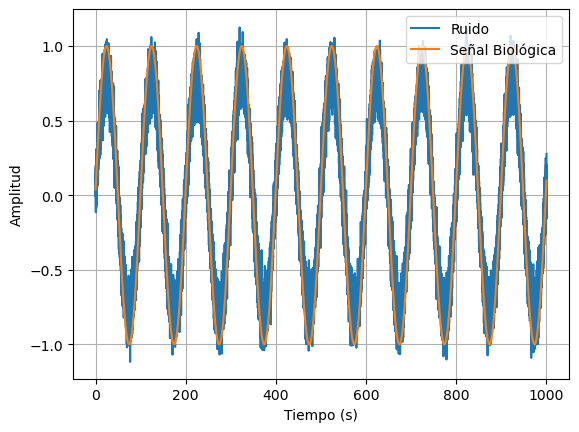

In [41]:
plt.figure()
plt.plot(n, y_e)
plt.plot(n, x_e)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend(['Ruido', 'Señal Biológica'])
plt.grid()
plt.show()

Text(0.5, 0, 'Tiempo (s)')

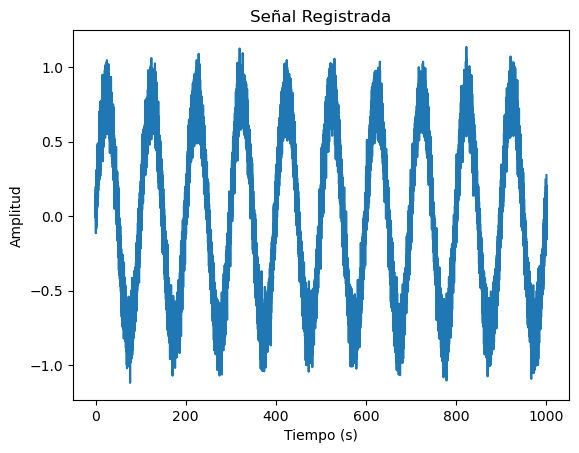

In [42]:
plt.plot(n,y_e)
plt.title('Señal Registrada')
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")

**4.2. Diseño de un filtro**

La función firwin permite diseñar un filtro FIR utilizando el método de ventanas, donde los principales argumentos de entrada son N: Orden del filtro y W_n: Frecuencia de corte. Para filtros digitales W_n está normalizado entre 0 y 1, donde 1 es la frecuencia de Nyquist que es igual a la mitad de la frecuencia de muestreo de la señal. W_n es igual a la frecuencia de corte del filtro dividido la frecuencia de Nyquist.



* Diseñe un filtro FIR pasa bajas para la señal y_e (n), con una frecuencia de corte de 1.25 muestras/s y orden 30.

In [26]:
order = 30 # orden calculado segun requerimientos
nyquist = Fs/2 # frecuencia de nyquist
wn = 1.25/nyquist #frecuencia de corte normalizada respecto nyquist
lowpass = signal.firwin(order+1,wn, pass_zero = 'lowpass',window='hamming') #filtro
y_fpb_30 = signal.filtfilt(b=lowpass,a=1,x=y_e) # aplicación del filtro


* ¿Qué cambios hay en los argumentos de la función para implementar un filtro pasa banda y pasa altas? Pruebe con una frecuencia de corte adicional de 7.5 muestras/s.

In [27]:
order = 30 # orden calculado segun requerimientos
nyquist = Fs/2 # frecuencia de nyquist
wn = 7.5/nyquist #frecuencia de corte normalizada respecto nyquist
highpass = signal.firwin(order+1,wn, pass_zero = 'highpass',window='hamming') #filtro
y_fpa_30 = signal.filtfilt(b=highpass,a=1,x=y_e) # aplicación del filtro


In [28]:
order = 30 # orden calculado segun requerimientos
nyquist = Fs/2 # frecuencia de nyquist
wn_low = 7.5/nyquist #frecuencia de corte normalizada respecto nyquist
wn_high= 1.25/nyquist
bandpass = signal.firwin(order+1,[wn_high,wn_low], pass_zero = 'bandpass',window='hamming') #filtro
y_fpbd_30 = signal.filtfilt(b=bandpass,a=1,x=y_e) # aplicación del filtro


Text(0.5, 0, 'Tiempo (s)')

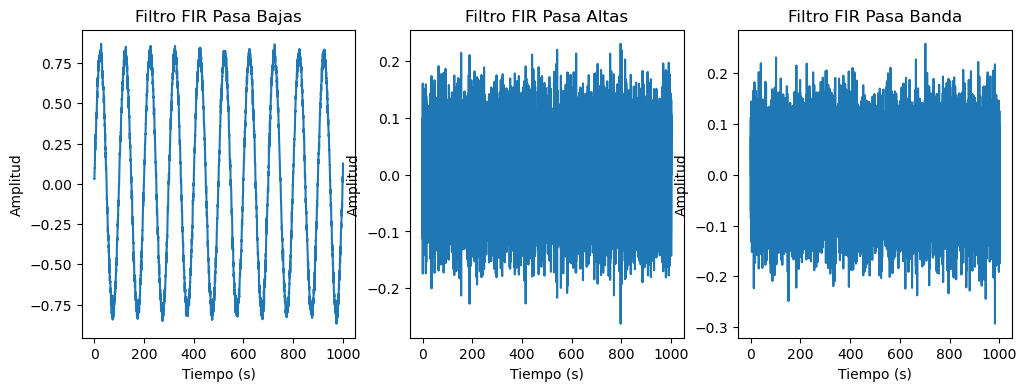

In [29]:
plt.figure(figsize=(12,4))

plt.subplot(131)
plt.plot(n,y_fpb_30)
plt.title("Filtro FIR Pasa Bajas")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.subplot(132)
plt.plot(n,y_fpa_30)
plt.title("Filtro FIR Pasa Altas")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")
plt.subplot(133)
plt.plot(n,y_fpbd_30)
plt.title("Filtro FIR Pasa Banda")
plt.ylabel("Amplitud")
plt.xlabel("Tiempo (s)")

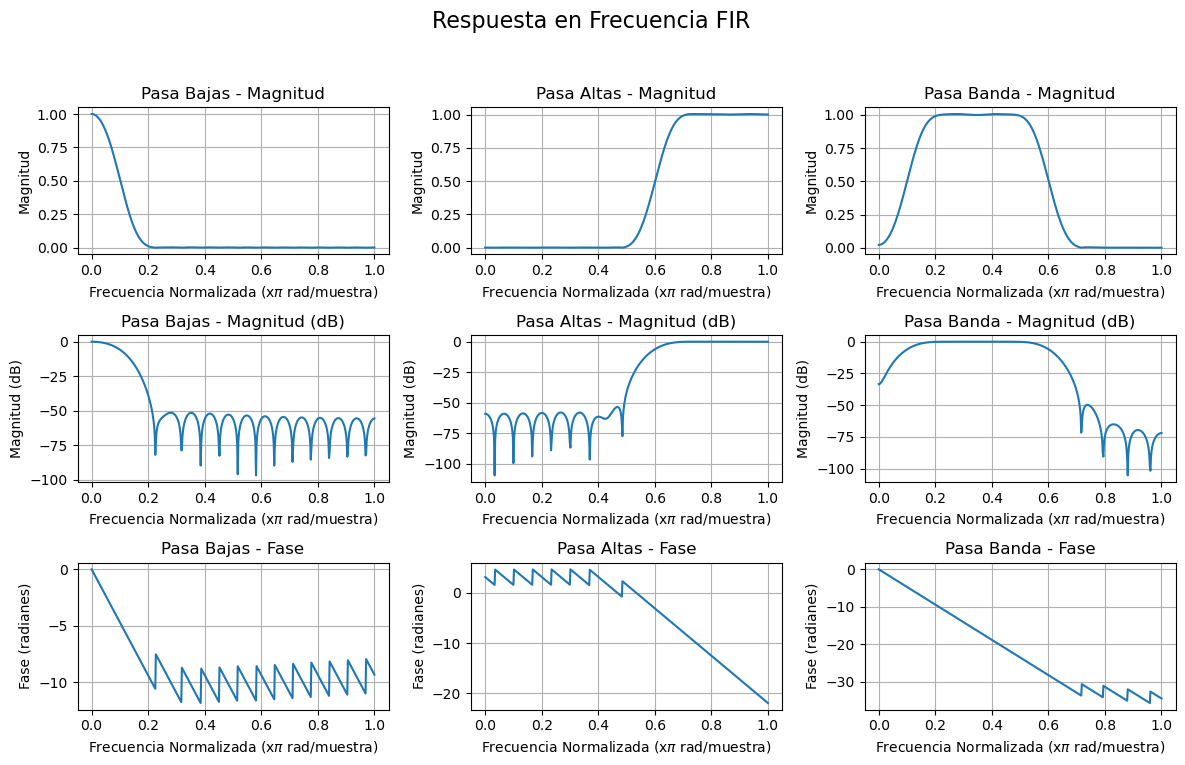

In [43]:
mfreqz(lowpass,highpass, bandpass, a=1, order=30, nyq_rate=1,main_title="Respuesta en Frecuencia FIR")

* Diseñe un filtro IIR en las mismas condiciones de los puntos anteriores. Compare 
cambios. 

Dado que la frecuencia de corte está en términos de muestras por segundo, las frecuencias de corte deben ser normalizadas a la frecuencia de Nyquist, que es la mitad de la frecuencia de muestreo. En este caso, las frecuencias de corte deben dividirse por la frecuencia de Nyquist.

In [30]:
from scipy.signal import iirfilter, lfilter, freqz
# Parámetros del filtro
order = 30            # Orden del filtro
fs = 15               # Frecuencia de muestreo en muestras/s
nyquist = fs / 2      # Frecuencia de Nyquist

# Frecuencias de corte normalizadas
low_cutoff = 1.25 / nyquist   # Para el filtro paso-bajas

* Diseñe un filtro IIR pasa bajas para la señal y_e (n), con una frecuencia de corte de 1.25 muestras/s y orden 30.

In [31]:
# Filtro paso-bajas
b_low, a_low = iirfilter(order, low_cutoff, btype='low', ftype='butter')
ye_low_filtered = lfilter(b_low, a_low, y_e)  # Aplicar el filtro paso-bajas a la señal y_e

* ¿Qué cambios hay en los argumentos de la función para implementar un filtro pasa banda y pasa altas? Pruebe con una frecuencia de corte adicional de 7.5 muestras/s.

Si tomamos para el filtro pasa-altas la frecuencia de corte como 7.5 que corresponde a la frecuencia de nyquist, no es válido para un filtro digital, ya que la frecuencia de corte debe estar estrictamente menor que la frecuencia de Nyquist.
por tanto para el filtro pasa-altas tomamos ligeramente menor que 7.5

¿Qué cambia entre los filtros?

* Para el filtro paso-bajas, solo usamos una frecuencia de corte baja (1.25 muestras/s).
* Para el filtro paso-altas, usamos una frecuencia de corte alta (7.49 muestras/s).
* Para el filtro paso-banda, definimos un rango de frecuencias de corte, en este caso, entre 1.25 y 7.49 muestras/s.

In [32]:
# Frecuencias de corte normalizadas
high_cutoff = (7.49 / nyquist)   # Para el filtro paso-altas (ligeramente menor que 7.5)
band_cutoff = [1.25 / nyquist, (7.49 / nyquist)]  # Para el filtro paso-banda

# Filtro paso-altas
b_high, a_high = iirfilter(order, high_cutoff, btype='high', ftype='butter')
ye_high_filtered = lfilter(b_high, a_high, y_e)  # Aplicar el filtro paso-altas a la señal y_

# Filtro paso-banda
b_band, a_band = iirfilter(order, band_cutoff, btype='band', ftype='butter')
ye_band_filtered = lfilter(b_band, a_band, y_e)  # Aplicar el filtro paso-banda a la señal y_e

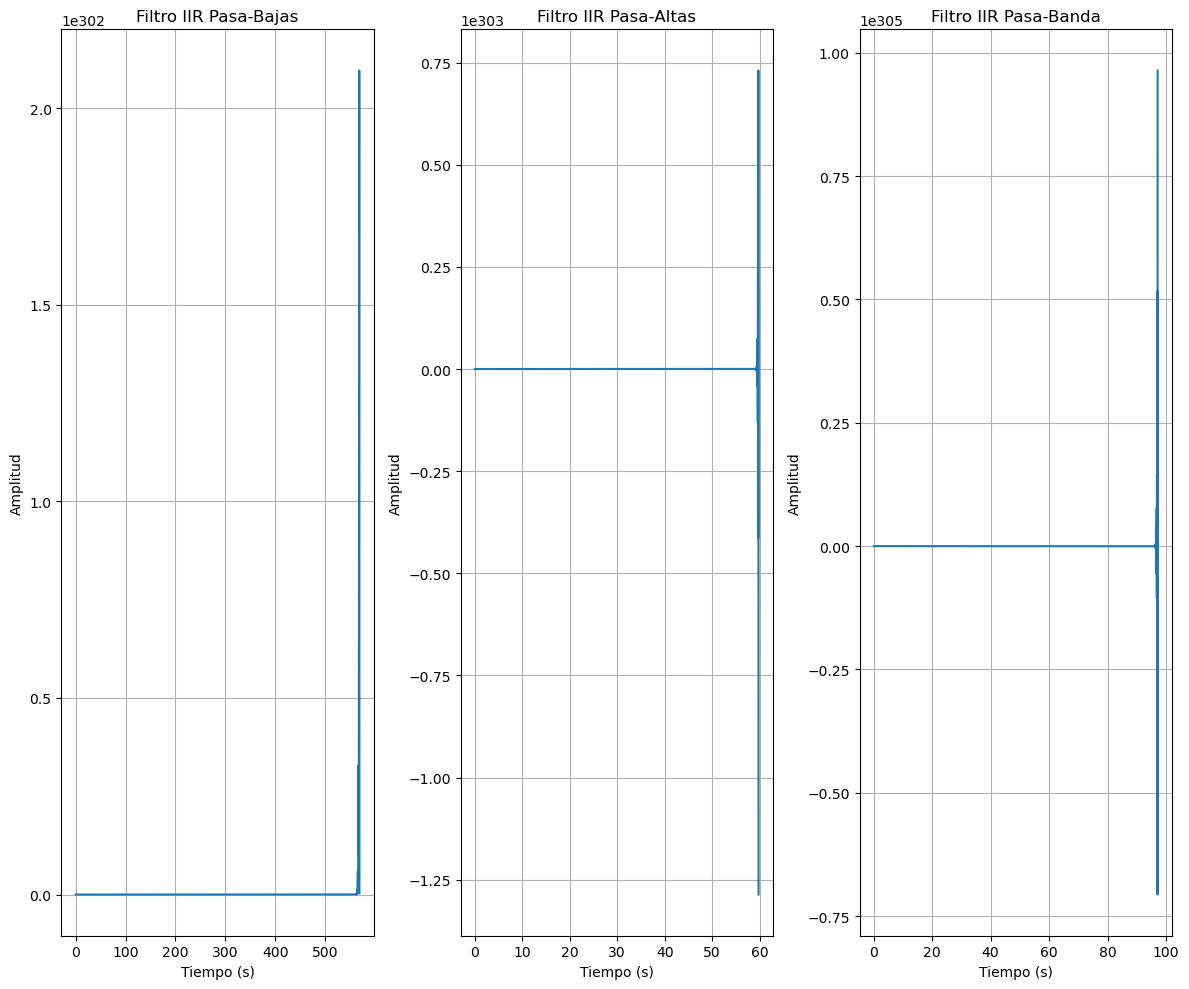

In [33]:
# Graficar señales filtradas
plt.figure(figsize=(12, 10))

# Señal filtrada pasa-bajas
plt.subplot(1, 3, 1)
plt.plot(n, ye_low_filtered)
plt.title('Filtro IIR Pasa-Bajas')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid()

# Señal filtrada pasa-altas
plt.subplot(1, 3, 2)
plt.plot(n, ye_high_filtered)
plt.title('Filtro IIR Pasa-Altas')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid()

# Señal filtrada pasa-banda
plt.subplot(1, 3, 3)
plt.plot(n, ye_band_filtered)
plt.title('Filtro IIR Pasa-Banda')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid()

plt.tight_layout()
plt.show()

**4.3. Filtrado**

Las funciones lfilter y filtfilt filtran una secuencia de información 𝑥(𝑛) usando un filtro IIR o FIR.
* Pruebe dichos comandos utilizando la información entregada por el filtro pasa bajas FIR implementado anteriormente y la señal 𝑦𝑒(𝑛)

¿Por qué se utiliza sólo el numerador?

Cuando implementas un filtro FIR (Finite Impulse Response), solo necesitas el numerador de la función de transferencia, ya que el filtro FIR no tiene retroalimentación y, por lo tanto, no necesita el denominador. El numerador está compuesto por los coeficientes del filtro, que determinan cómo se combinan las muestras de la señal de entrada para generar la señal de salida.

¿A qué hace referencia el numerador?

El numerador en el contexto de un filtro FIR se refiere a la respuesta al impulso del filtro. Esencialmente, describe cómo el filtro afectará a cada muestra de la señal de entrada en función de las muestras anteriores. Los coeficientes del numerador representan la contribución de cada muestra de entrada al resultado filtrado.

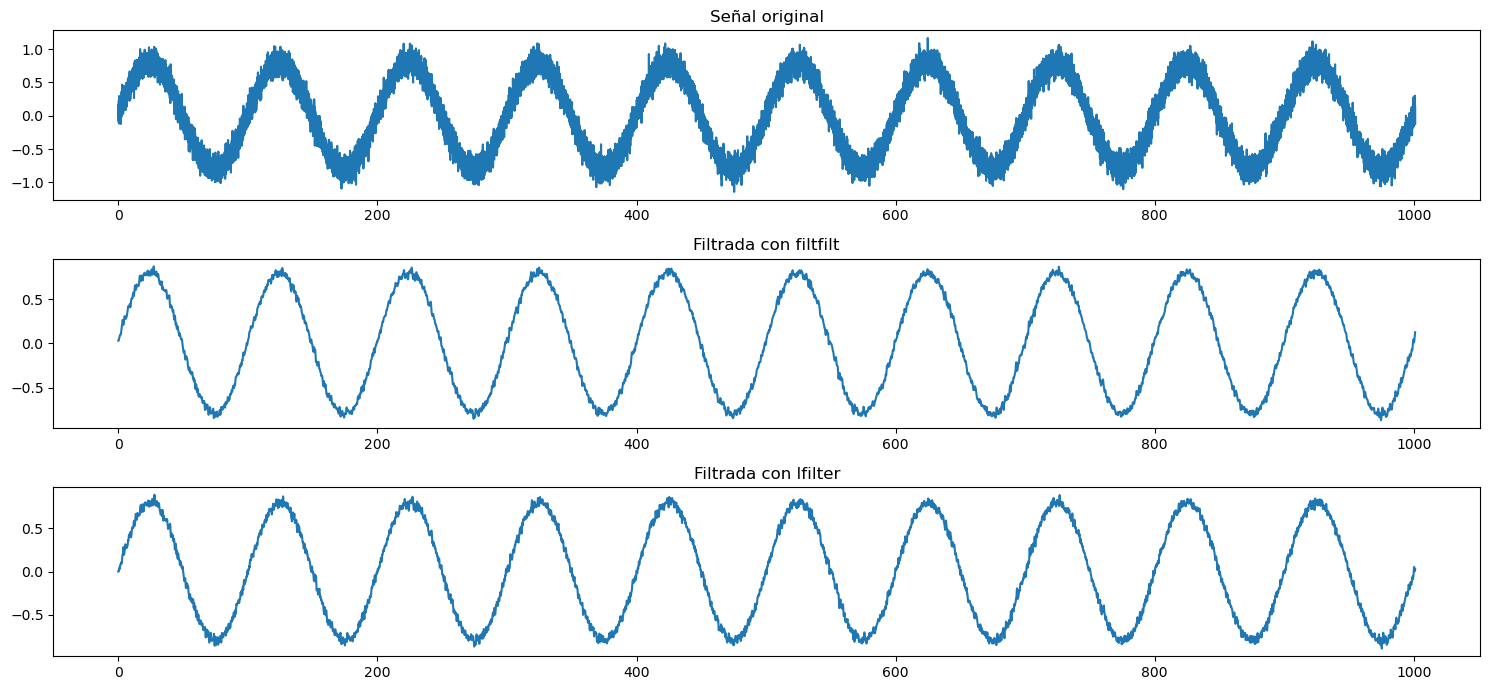

In [34]:
y_FIR=signal.filtfilt(b=lowpass,a=1,x=y_e) #aplicación del filtro
y_FIR2=signal.lfilter(b=lowpass,a=1,x=y_e)
plt.figure(figsize=(15,7))
plt.subplot(311)
plt.plot(n,y_e)
plt.title('Señal original')
plt.subplot(312)
plt.plot(n,y_FIR)
plt.title('Filtrada con filtfilt')
plt.subplot(313)
plt.plot(n,y_FIR2)
plt.title('Filtrada con lfilter')
plt.tight_layout()

Evidencia de cambios en el uso de las funciones de filtrado
Al usar lfilter y filtfilt con el filtro pasa-bajas FIR aplicado a la señal 𝑦𝑒(𝑛) se observan cambios notables en la salida:


* Pruebe dichos comandos utilizando la información entregada por el filtro pasa bajas IIR implementado anteriormente y la señal 𝑦𝑒(𝑛) ¿Por qué se utiliza el numerador y denominador? ¿Es necesario cambiar el orden del filtro? En tal caso hágalo y analice.

<hr>

**4.4. Aplicación**

Cargue la señal señal_filtros.txt adquirida a una frecuencia de muestreo de 500 Hz. 



In [44]:
file = pd.read_csv('senal_filtros.txt', sep = '\s+', header = None)
file.head()

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\USER\AppData\Local\Temp\ipykernel_5904\1315970969.py:1: SyntaxWarning: invalid escape sequence '\s'
  file = pd.read_csv('senal_filtros.txt', sep = '\s+', header = None)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-7.0306,-3.5899,-2.7995,-6.8884,0.9126,-6.7908,4.3411,6.5558,2.5295,-3.5293,-0.1973,-0.8435,0.7202,1.1319,1.3364,-7.3164
1,-7.0157,-3.5755,-2.7809,-6.8658,0.9288,-6.7672,4.3691,6.5822,2.5637,-3.5019,-0.1715,-0.8095,0.7518,1.1564,1.3747,-7.2797
2,-7.0426,-3.6058,-2.7972,-6.8852,0.9068,-6.7855,4.3449,6.5713,2.5465,-3.5271,-0.1917,-0.8273,0.7263,1.1290,1.3568,-7.2978
3,-7.0599,-3.6356,-2.8107,-6.8951,0.8900,-6.8084,4.3239,6.5683,2.5225,-3.5532,-0.2127,-0.8512,0.6976,1.0976,1.3305,-7.3204
4,-7.0538,-3.6399,-2.7953,-6.8751,0.9060,-6.7994,4.3398,6.5981,2.5667,-3.5144,-0.1691,-0.8081,0.7417,1.1319,1.3765,-7.2710


Extraiga y trabaje con el canal 1 de la señal.

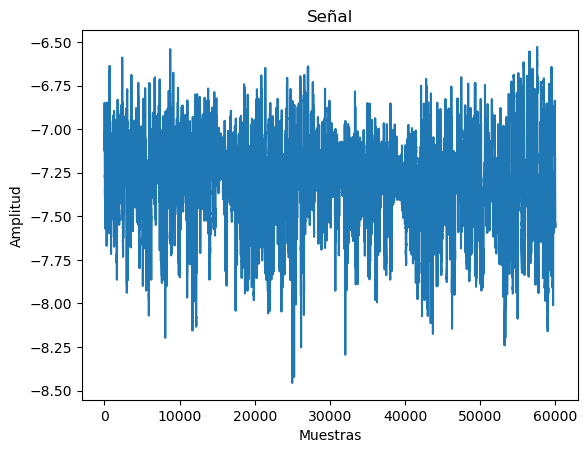

In [45]:
canal1 = file[0]
fs = 500
Ts = 1/fs

plt.figure()
plt.plot(canal1)
plt.title('Señal')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.show()

* Realice un análisis frecuencial con la función que permite calcular el
periodograma de Welch de una señal ¿Hay presencia de ruido eléctrico? Analice. 

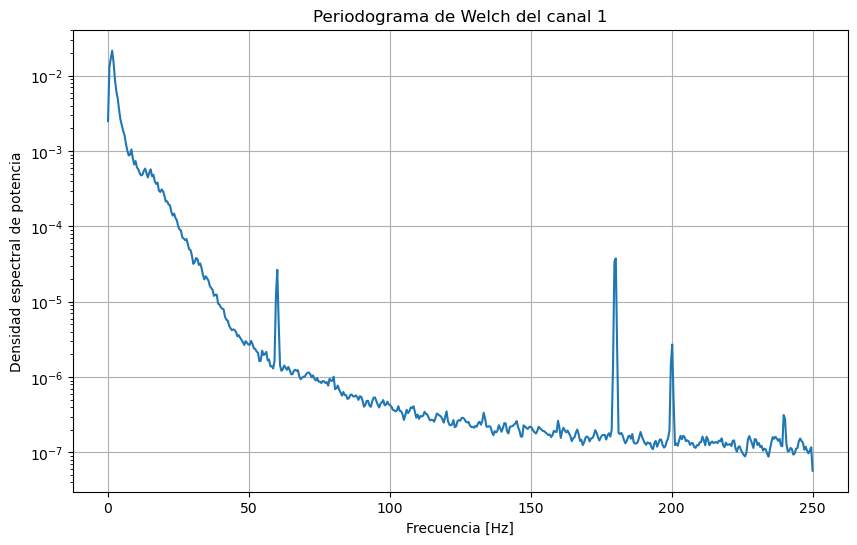

In [46]:
from scipy.signal import welch, firwin, filtfilt
nperseg = 1024 # Ancho de la ventana, nperseg no debe ser mayor que la longitud de la señal
noverlap = int(nperseg / 2)  # Solapamiento de las ventanas del 50%
ventana = np.hanning(nperseg)  # Ventana Hanning
# Calcular el periodograma de Welch
f, power = welch(canal1, fs, window=ventana, nperseg=nperseg, noverlap=noverlap)

# Graficar el periodograma
plt.figure(figsize=(10, 6))
plt.semilogy(f, power)
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Densidad espectral de potencia')
plt.title('Periodograma de Welch del canal 1')
plt.grid(True)
plt.show()

¿Hay presencia de ruido electrico?

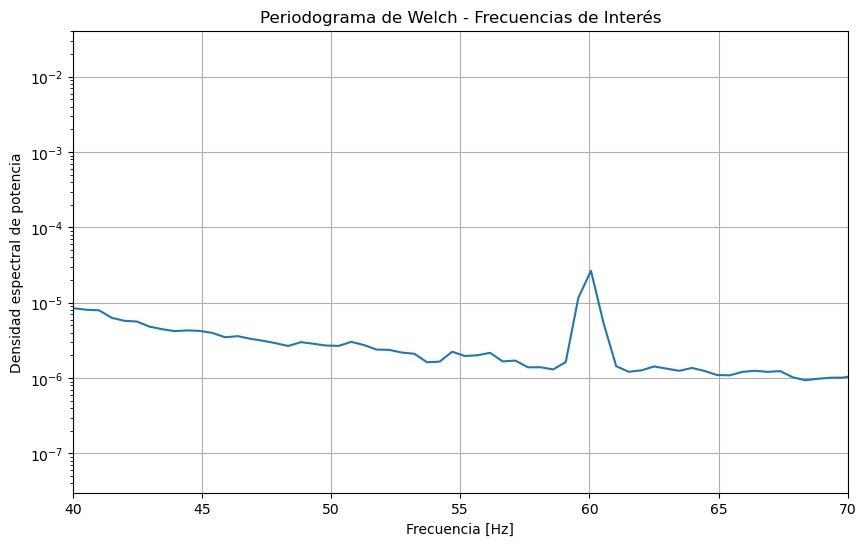

In [47]:
# Graficar el periodograma
plt.figure(figsize=(10, 6))
plt.semilogy(f, power)
plt.xlim(40,70)
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Densidad espectral de potencia')
plt.title('Periodograma de Welch - Frecuencias de Interés')
plt.grid(True)
plt.show()

* Diseñe un filtro FIR que permita eliminar el ruido de la señal. Grafique. Luego
verifique nuevamente el comportamiento en frecuencia (periodograma de Welch de la señal filtrada) ¿Hay cambios? Analice.

* Grafique un segmento de las señales antes y después de filtrar, analice los
cambios